# Fourier phase spectra of coherent structures 

Me:

I want to understand the Fourier spectrum view of a localized excursion like a Gaussian peak when it appears at different locations in a domain. The power spectrum is unaffected by the location of the peak, but how is the phase spectrum affected when the peak is moved? Is there any way to detect the coherent local nature of the peak from the structure of the Fourier phase spectrum? Any Python code to illustrate this problem would be very helpful to my understanding.

ChatGPT:

Certainly! Understanding the Fourier spectrum view of a localized excursion like a Gaussian peak can be insightful. When you move a peak in the spatial domain, it corresponds to a phase shift in the frequency domain. The magnitude spectrum (power spectrum) remains unchanged, but the phase spectrum is affected.

To illustrate this, you can create a simple Python script using the NumPy library to generate a Gaussian peak, shift it, and analyze its Fourier transform. Here's an example:

# 2D or 1D? Start with 1D 

# 1D version 

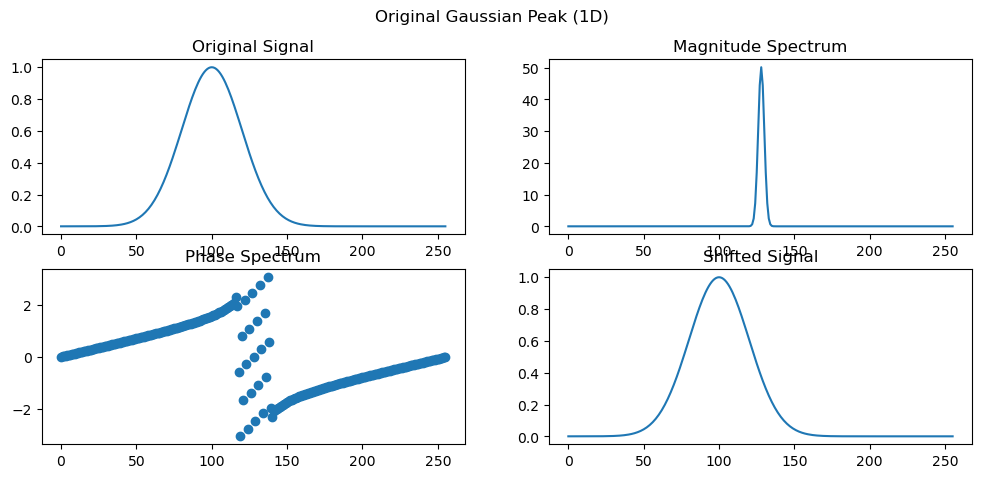

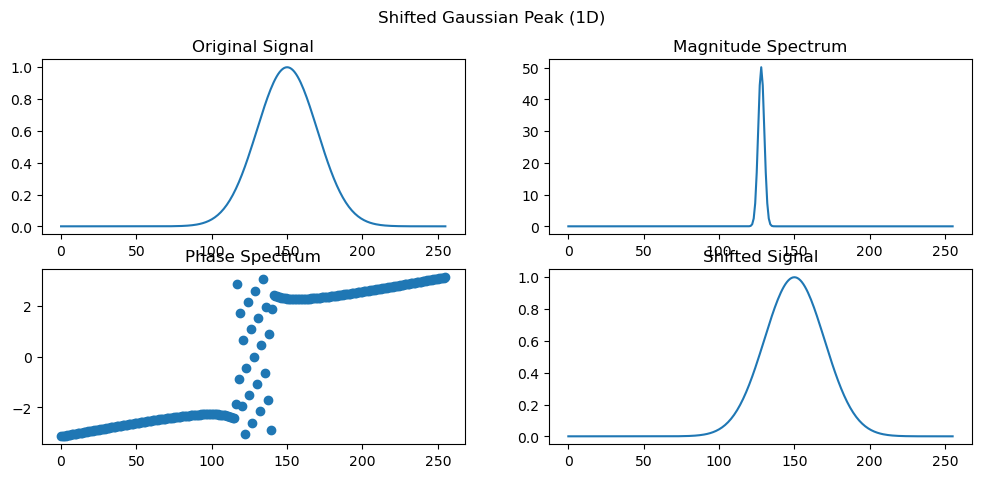

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift

def create_gaussian_peak_1d(length, center, sigma):
    x = np.arange(length)
    return np.exp(-((x - center)**2) / (2 * sigma**2))

def plot_fft_spectrum_1d(signal, title):
    spectrum = fft(signal)
    spectrum_shifted = fftshift(spectrum)

    magnitude_spectrum = np.abs(spectrum_shifted)
    phase_spectrum = np.angle(spectrum_shifted)

    plt.figure(figsize=(12, 5))

    plt.subplot(221)
    plt.plot(signal)
    plt.title('Original Signal')

    plt.subplot(222)
    plt.plot(np.abs(spectrum_shifted))
    plt.title('Magnitude Spectrum')

    plt.subplot(223)
    plt.plot(phase_spectrum, marker='o', linestyle='None')
    plt.title('Phase Spectrum')

    shifted_signal = ifft(fftshift(spectrum_shifted))
    plt.subplot(224)
    plt.plot(np.real(shifted_signal))
    plt.title('Shifted Signal')

    plt.suptitle(title)
    plt.show()

# Parameters
signal_length = 256
peak_center1 = 100
peak_center2 = 150
sigma = 20

# Create Gaussian peak at the original location
original_peak_1d = create_gaussian_peak_1d(signal_length, peak_center1, sigma)
plot_fft_spectrum_1d(original_peak_1d, 'Original Gaussian Peak (1D)')

# Create Gaussian peak at a different location
shifted_peak_1d = create_gaussian_peak_1d(signal_length, peak_center2, sigma)
plot_fft_spectrum_1d(shifted_peak_1d, 'Shifted Gaussian Peak (1D)')


# 2D images 

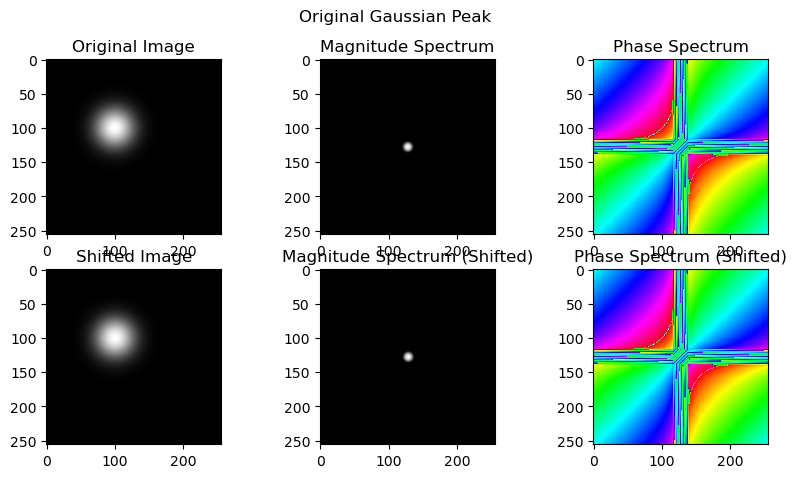

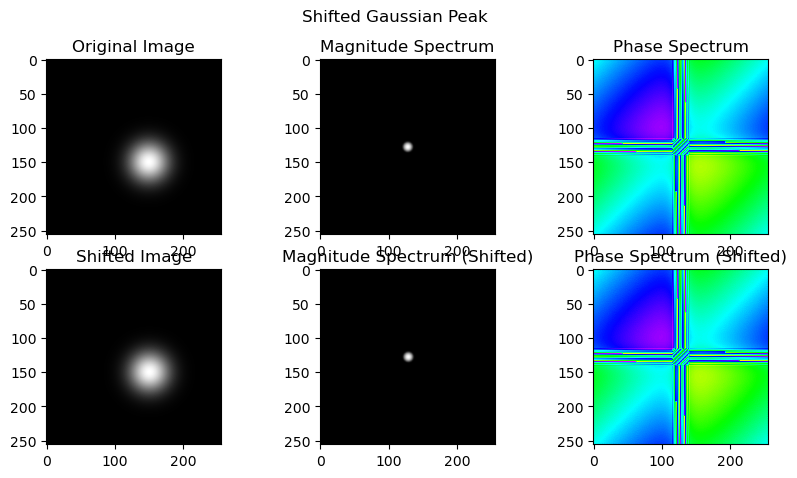

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2, ifft2

def create_gaussian_peak(shape, center, sigma):
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    return np.exp(-((x - center[0])**2 + (y - center[1])**2) / (2 * sigma**2))

def plot_fft_spectrum(image, title):
    spectrum = fft2(image)
    spectrum_shifted = fftshift(spectrum)

    magnitude_spectrum = np.abs(spectrum_shifted)
    phase_spectrum = np.angle(spectrum_shifted)

    plt.figure(figsize=(10, 5))

    plt.subplot(231)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(232)
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title('Magnitude Spectrum')

    plt.subplot(233)
    plt.imshow(phase_spectrum, cmap='hsv')
    plt.title('Phase Spectrum')

    shifted_image = ifft2(fftshift(spectrum_shifted))
    plt.subplot(234)
    plt.imshow(np.real(shifted_image), cmap='gray')
    plt.title('Shifted Image')

    plt.subplot(235)
    plt.imshow(np.log(1 + np.abs(fftshift(fft2(shifted_image)))), cmap='gray')
    plt.title('Magnitude Spectrum (Shifted)')

    plt.subplot(236)
    plt.imshow(np.angle(fftshift(fft2(shifted_image))), cmap='hsv')
    plt.title('Phase Spectrum (Shifted)')

    plt.suptitle(title)
    plt.show()

# Parameters
image_shape = (256, 256)
peak_center1 = (100, 100)
peak_center2 = (150, 150)
sigma = 20

# Create Gaussian peak at the original location
original_peak = create_gaussian_peak(image_shape, peak_center1, sigma)
plot_fft_spectrum(original_peak, 'Original Gaussian Peak')

# Create Gaussian peak at a different location
shifted_peak = create_gaussian_peak(image_shape, peak_center2, sigma)
plot_fft_spectrum(shifted_peak, 'Shifted Gaussian Peak')
